In [35]:
#Para importar as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\Bruno\AppData\Local\Temp\ipykernel_12896\3210381308.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
#Criando o DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [5]:
#Removendo colunas "inúteis" no momento
df.drop(columns=["No. Venda", "ID Cliente", "ID Produto", "ID Loja"], inplace=True)

In [6]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [7]:
#Visualizar a receita total
df["Valor Venda"].sum()

5984606.1426

In [8]:
#Visualizar o custo
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [9]:
df.head(1)

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [10]:
#Visualizar o custo total
round(df["Custo"].sum(), 2)

2486783.05

In [11]:
df.head(1)

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [12]:
#Tendo a receita, o custo e o total, acharemos o lucro total
#Criamos uma coluna de Lucro que vai ser (Receita - Custo)
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [13]:
df.head(1)

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [14]:
#Total Lucro
round(df["Lucro"].sum(), 2)

3497823.09

In [15]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]
df.head(1)

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


In [16]:
#Extraindo apenas os dias
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days
df.head(1)

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [17]:
#Média de tempo de envia por marca
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo Envio, dtype: float64

In [18]:
#Verificando se há dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

In [19]:
#Agrupando ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works    3.066412e+05
            Contoso            5.641600e+04
            Fabrikam           1.557021e+06
2009        Adventure Works    4.053951e+05
            Contoso            1.382590e+05
            Fabrikam           1.034091e+06
Name: Lucro, dtype: float64

In [20]:
pd.options.display.float_format = '{:20,.2f}'.format

In [21]:
#Resetando o Index
lucro_ano = df.groupby([df["Data Venda"]. dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [22]:
#Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

Text(0, 0.5, 'Produto')

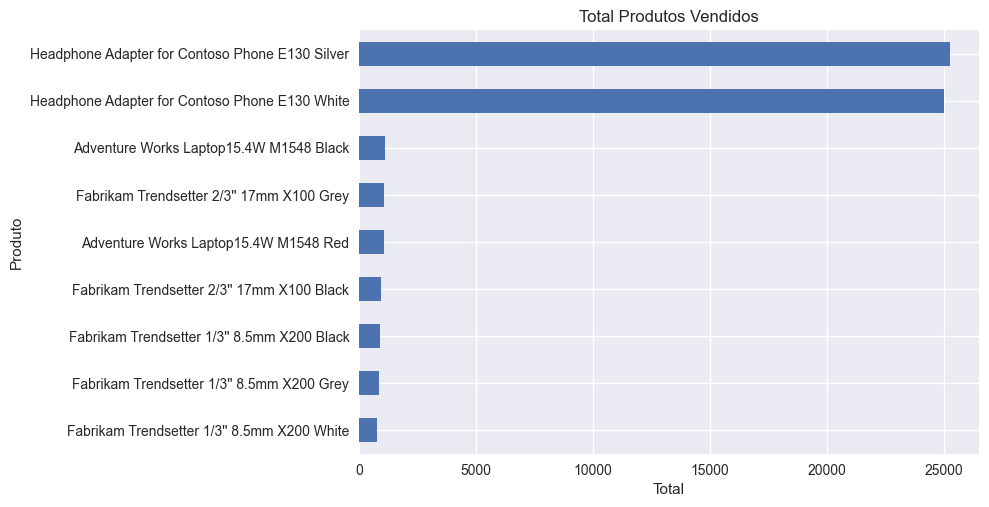

In [23]:
#Gráfico total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto")

<AxesSubplot: title={'center': 'Lucro X Ano'}, xlabel='Data Venda'>

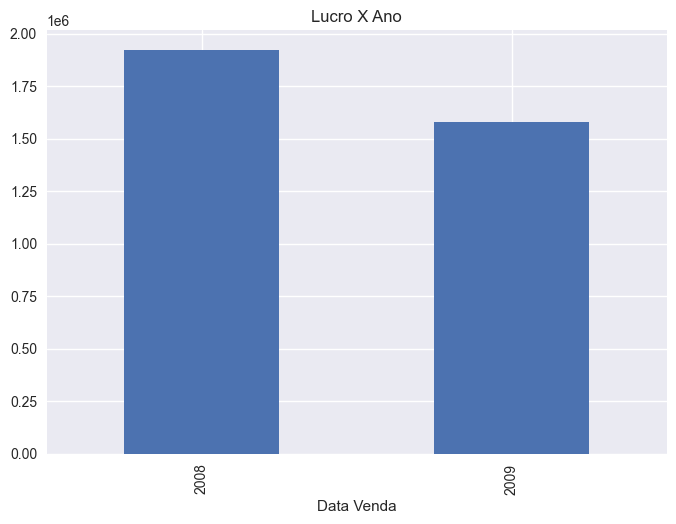

In [24]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro X Ano")

In [25]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [26]:
#Selecionando apenas vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [27]:
df_2009.head(1)

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12


Text(0, 0.5, 'Lucro')

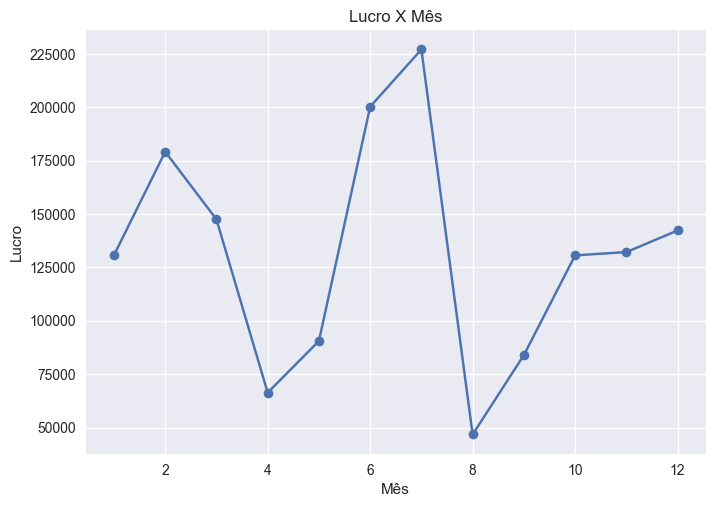

In [28]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro X Mês", marker="o")
plt.xlabel("Mês")
plt.ylabel("Lucro")

(array([0, 1, 2]),
 [Text(0, 0, 'Adventure Works'),
  Text(1, 0, 'Contoso'),
  Text(2, 0, 'Fabrikam')])

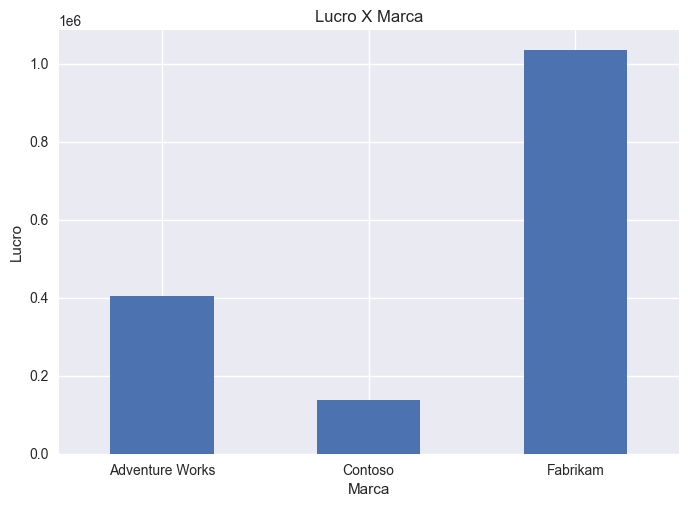

In [29]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro X Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

(array([0, 1]), [Text(0, 0, 'Economy'), Text(1, 0, 'Regular')])

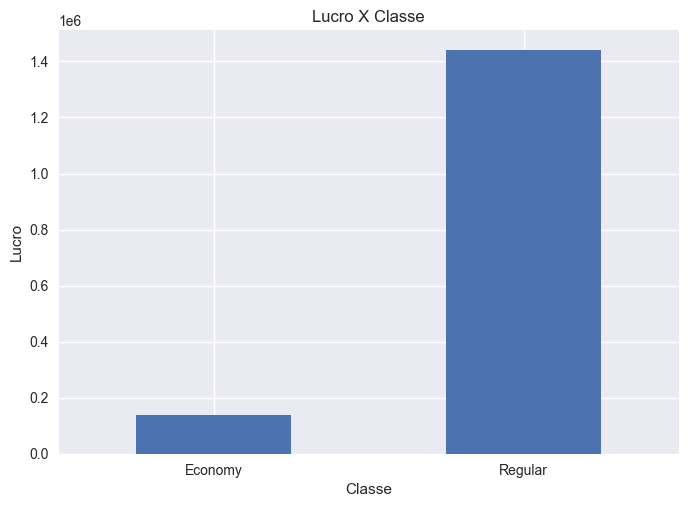

In [30]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro X Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation="horizontal")

In [31]:
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2ecfff17cd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2ecfff4c130>,
 'boxes': [<matplotlib.lines.Line2D at 0x2ecfff17a30>],
 'medians': [<matplotlib.lines.Line2D at 0x2ecfff4c670>],
 'fliers': [<matplotlib.lines.Line2D at 0x2ecfff4c910>],
 'means': []}

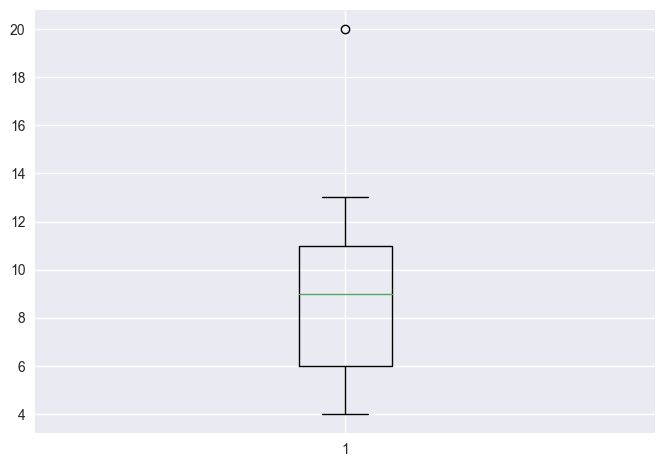

In [38]:
plt.boxplot(df["Tempo Envio"])

(array([217., 137.,  70., 179., 115., 185.,   0.,   0.,   0.,   1.]),
 array([ 4. ,  5.6,  7.2,  8.8, 10.4, 12. , 13.6, 15.2, 16.8, 18.4, 20. ]),
 <BarContainer object of 10 artists>)

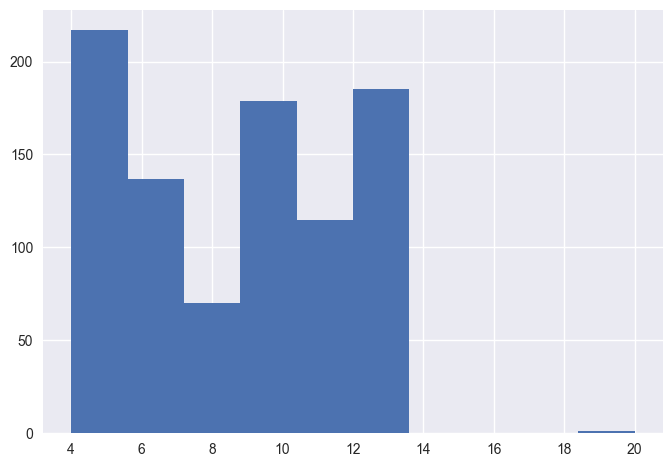

In [37]:
plt.hist(df["Tempo Envio"])

In [39]:
#Tempo mínimo de envio
df["Tempo Envio"].min()

4

In [40]:
#Tempo máximo de envio
df["Tempo Envio"].max()

20

In [41]:
#Indentificando o Outlier
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


Text(0, 0.5, 'Cores')

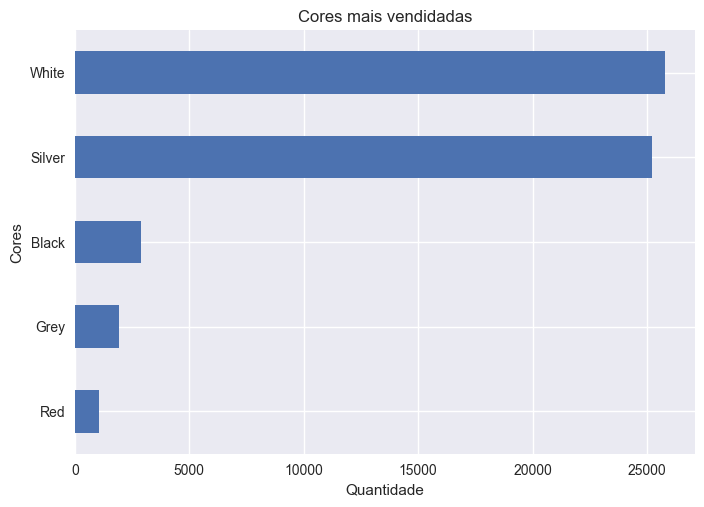

In [42]:
#Gráfico com as cores mais vendidas
df.groupby("Cor")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title="Cores mais vendidadas")
plt.xlabel("Quantidade")
plt.ylabel("Cores")

In [35]:
df.to_csv("vendas.csv", index=False)